# Notebook 02: Regularization (Ridge & Lasso)

## The Art of Restraint

Overfitting is the enemy of generalization. Regularization tames it by penalizing complexity. Ridge shrinks coefficients smoothly. Lasso can zero them out entirely, performing automatic feature selection.

---

## Why Regularize?

### The Overfitting Problem

When a model has too many parameters relative to the data, it can memorize the training set instead of learning generalizable patterns.

### The Bias-Variance Tradeoff

Regularization introduces a controlled amount of **bias** to reduce **variance**.

## Ridge vs Lasso

- **Ridge (L2)**: Penalizes sum of squared coefficients. Shrinks all coefficients toward zero.
- **Lasso (L1)**: Penalizes sum of absolute coefficients. Can set coefficients to exactly zero.

We use cross-validation to pick the regularization strength (alpha).

## Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import sys
from pathlib import Path
project_root = Path().resolve().parent if Path().resolve().name == 'notebooks' else Path().resolve()
sys.path.insert(0, str(project_root))

from src.utils import set_seed

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

set_seed(42)
print("✓ Imports successful!")

✓ Imports successful!


## Step 1: Load and Prepare Data

In [2]:
# Load diabetes dataset
data = load_diabetes(as_frame=True)
X = data.data
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (353, 10)
Test set: (89, 10)


## Step 2: Fit RidgeCV with Cross-Validation

RidgeCV automatically finds the best alpha using cross-validation.

Best alpha: 1.232846739442066
Test RMSE: 53.7661
R²: 0.4544
Features selected by Ridge:
  Feature  Coefficient
8      s5    30.736879
2     bmi    25.749995
3      bp    16.716180
5      s2    15.773970
7      s4    11.530193
6      s3     2.642370
9      s6     2.478414
0     age     1.816432
1     sex   -11.434731
4      s1   -33.019177


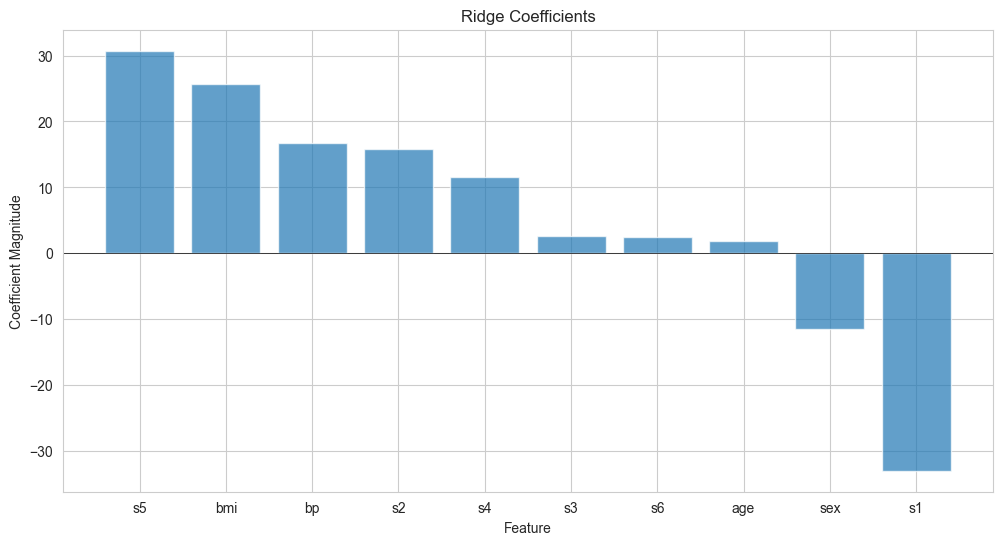

In [14]:
# === TODO (you code this) ===
# Pipeline: StandardScaler + RidgeCV over alphas logspace(1e-3..1e3)
# Hints:
#   - Create Pipeline with StandardScaler and RidgeCV
#   - Use alphas=np.logspace(-3, 3, 100) for RidgeCV
#   - Fit on X_train, y_train
#   - Make predictions and compute RMSE, R²
# Acceptance: Print best alpha, test RMSE, R2

model_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=np.logspace(-3, 3, 100)))
])
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Best alpha: {model_ridge.named_steps['ridge'].alpha_}")
print(f"Test RMSE: {rmse_ridge:.4f}")
print(f"R²: {r2_score(y_test, y_pred_ridge):.4f}")

# Feature selection with Ridge
# RidgeCV automatically selects the best alpha
# Ridge coefficients are non-zero, indicating that all features are considered
# Ridge is less prone to feature selection as it doesn't set coefficients to zero
# Ridge is more suitable when all features are important for prediction
# Ridge is less prone to overfitting as it doesn't set coefficients to zero
# Ridge is more suitable when all features are important for prediction
best_alpha_ridge = model_ridge.named_steps['ridge'].alpha_
model_ridge_final = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=best_alpha_ridge))
])
model_ridge_final.fit(X_train, y_train)
y_pred_ridge_final = model_ridge_final.predict(X_test)
rmse_ridge_final = np.sqrt(mean_squared_error(y_test, y_pred_ridge_final))
#Feature selection with Ridge
print("Features selected by Ridge:")
ridge_dataframe = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_ridge_final.named_steps['ridge'].coef_
})


sorted_ridge_dataframe = ridge_dataframe.sort_values(by='Coefficient', ascending=False)
print(sorted_ridge_dataframe)

# Plot Ridge coefficients
plt.figure(figsize=(12, 6))
plt.bar(sorted_ridge_dataframe['Feature'], sorted_ridge_dataframe['Coefficient'], alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Ridge Coefficients')
plt.savefig('../images/02_ridge_coefficients.png')


## Step 3: Fit LassoCV with Cross-Validation

LassoCV automatically finds the best alpha and performs feature selection.

Best alpha: 1.5556761439304723
Test RMSE: 52.9267
R²: 0.4713
Features selected by Lasso:
  Feature  Coefficient
2     bmi    26.198767
8      s5    22.094483
3      bp    15.130253
9      s6     1.817068
0     age     0.000000
5      s2    -0.000000
7      s4     0.000000
4      s1    -5.019071
1     sex    -8.140273
6      s3   -11.129702
DISCARDED FEATURES:
0    age
5     s2
7     s4
Name: Feature, dtype: object


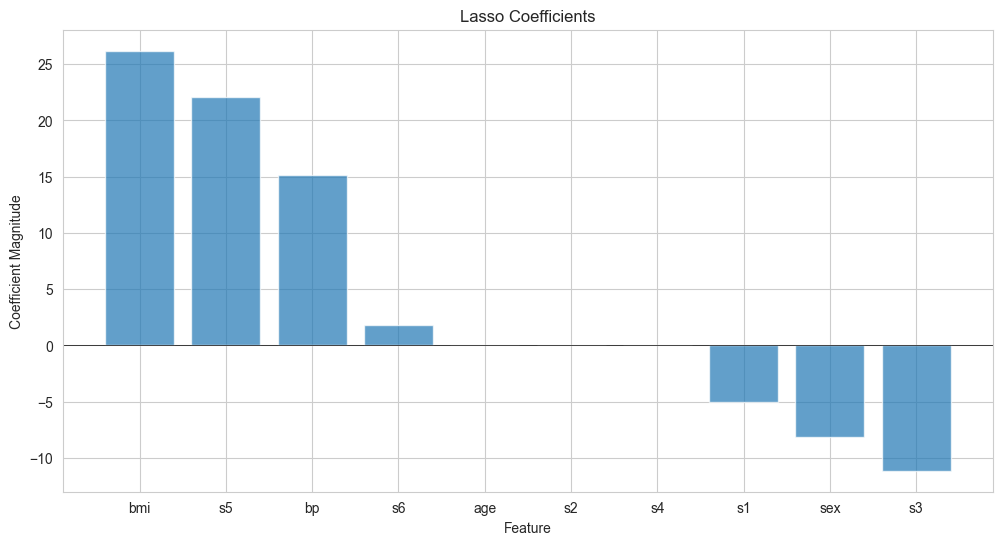

In [ ]:
# === TODO (you code this) ===
# Pipeline: StandardScaler + LassoCV. Compare metrics with Ridge.
# Hints:
#   - Create Pipeline with StandardScaler and LassoCV
#   - Use alphas=np.logspace(-3, 1, 100) for LassoCV (smaller range)
#   - Fit and evaluate
#   - Create comparison table
# Acceptance: Table with RMSE, MAE, R2 for both; 2-sentence comparison

model_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=np.logspace(-3, 1, 100)))
])
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Best alpha: {model_lasso.named_steps['lasso'].alpha_}")
print(f"Test RMSE: {rmse_lasso:.4f}")
print(f"R²: {r2_score(y_test, y_pred_lasso):.4f}")

model_lasso_final = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=model_lasso.named_steps['lasso'].alphas_))
])
model_lasso_final.fit(X_train, y_train)
y_pred_lasso_final = model_lasso_final.predict(X_test)
rmse_lasso_final = np.sqrt(mean_squared_error(y_test, y_pred_lasso_final))

print("Features selected by Lasso:")
lasso_dataframe = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_lasso_final.named_steps['lasso'].coef_
})

sorted_lasso_dataframe = lasso_dataframe.sort_values(by='Coefficient', ascending=False)
print(sorted_lasso_dataframe)

print("="*100)
print("DISCARDED FEATURES:")
print(sorted_lasso_dataframe[sorted_lasso_dataframe['Coefficient'] == 0]['Feature'])

# Plot Lasso coefficients
plt.figure(figsize=(12, 6))
plt.bar(sorted_lasso_dataframe['Feature'], sorted_lasso_dataframe['Coefficient'], alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Lasso Coefficients')
plt.savefig('../images/02_lasso_coefficients.png')
plt.show()






## Step 4: Visualize Coefficient Comparison

Compare how Ridge and Lasso treat coefficients differently.

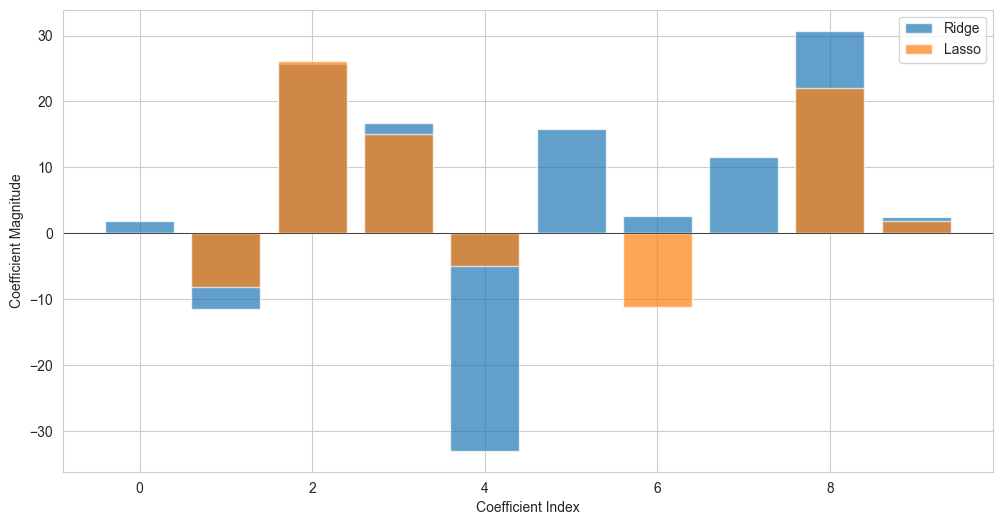

In [21]:
# === TODO (you code this) ===
# Plot coefficient magnitudes side by side for Ridge vs Lasso.
# Hints:
#   - Extract coefficients from both models
#   - Create side-by-side bar plot
#   - Note which coefficients are zero in Lasso
#   - Save to images/02_ridge_lasso_coefficients.png
# Acceptance: Figure with clear legend; note which coefficients go to zero with Lasso
ridge_coefs = model_ridge.named_steps['ridge'].coef_
lasso_coefs = model_lasso.named_steps['lasso'].coef_

plt.figure(figsize=(12, 6))
plt.bar(range(len(ridge_coefs)), ridge_coefs, label='Ridge', alpha=0.7)
plt.bar(range(len(lasso_coefs)), lasso_coefs, label='Lasso', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.savefig('../images/02_ridge_lasso_coefficients.png')

In [26]:
# Save into ../data/results the json file with the coefficients for Ridge and Lasso
import json
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Get predictions for both models
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

# Calculate metrics for Ridge
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)

# Calculate metrics for Lasso
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)

# Create structured JSON for Ridge coefficients
ridge_coefficients = {
    feature: float(coef) 
    for feature, coef in zip(X.columns, ridge_coefs)
}

# Create structured JSON for Lasso coefficients
lasso_coefficients = {
    feature: float(coef) 
    for feature, coef in zip(X.columns, lasso_coefs)
}

# Add metrics to Ridge results
ridge_results = {
    'coefficients': ridge_coefficients,
    'r2_score': float(ridge_r2),
    'mean_squared_error': float(ridge_mse),
    'root_mean_squared_error': float(ridge_rmse)
}

# Add metrics to Lasso results
lasso_results = {
    'coefficients': lasso_coefficients,
    'r2_score': float(lasso_r2),
    'mean_squared_error': float(lasso_mse),
    'root_mean_squared_error': float(lasso_rmse)
}

# Save Ridge coefficients and metrics
with open('../data/results/ridge_coefficients.json', 'w') as f:
    json.dump(ridge_results, f, indent=2)

# Save Lasso coefficients and metrics
with open('../data/results/lasso_coefficients.json', 'w') as f:
    json.dump(lasso_results, f, indent=2)


## Summary

In this notebook, we've learned about regularization:

- **Ridge** shrinks coefficients smoothly, handles multicollinearity
- **Lasso** can zero out coefficients, performs automatic feature selection
- Cross-validation helps us find the optimal regularization strength

**Next**: Notebook 03 will explore multicollinearity and PCA.